In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')  

In [2]:

df = pd.read_csv('cripto_data.csv')

print(df.head())


       coin symbol         price     1h    24h     7d    24h_volume  \
0   Bitcoin    BTC  40859.460000  0.022  0.030  0.055  3.539076e+10   
1  Ethereum    ETH   2744.410000  0.024  0.034  0.065  1.974870e+10   
2    Tether   USDT      1.000000 -0.001 -0.001  0.000  5.793497e+10   
3       BNB    BNB    383.430000  0.018  0.028  0.004  1.395854e+09   
4  USD Coin   USDC      0.999874 -0.001  0.000 -0.000  3.872274e+09   

        mkt_cap        date  
0  7.709915e+11  2022-03-16  
1  3.271044e+11  2022-03-16  
2  7.996516e+10  2022-03-16  
3  6.404382e+10  2022-03-16  
4  5.222214e+10  2022-03-16  


In [3]:
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16
...,...,...,...,...,...,...,...,...,...
495,ARPA Chain,ARPA,0.068516,0.028,0.026,-0.008,1.483831e+07,6.689248e+07,2022-03-16
496,GuildFi,GF,1.540000,0.005,0.007,0.041,7.298293e+06,6.637061e+07,2022-03-16
497,EverRise,RISE,0.000951,0.013,0.081,0.030,4.232180e+05,6.634045e+07,2022-03-16
498,SuperRare,RARE,0.458127,0.018,0.029,0.029,1.642138e+07,6.626426e+07,2022-03-16


In [4]:
# code to convert the 'date' column
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

### interpolate missing values 

In [5]:
# Interpolate missing values for numerical columns
df['1h'] = df['1h'].interpolate(method='linear')
df['24h'] = df['24h'].interpolate(method='linear')
df['7d'] = df['7d'].interpolate(method='linear')
df['24h_volume'] = df['24h_volume'].interpolate(method='linear')
# Verify the missing values are gone
print(df.isnull().sum())

coin          0
symbol        0
price         0
1h            0
24h           0
7d            0
24h_volume    0
mkt_cap       0
date          0
dtype: int64


* This bivariate analysis provides clear evidence of a strong, positive relationship between a cryptocurrency's market size and its trading activity. These insights validate creating a volume_mkt_cap_ratio feature. This new metric will directly capture this relationship and allow you to analyze a coin's liquidity and trading activity relative to its market size.

In [6]:
df['volume_mkt_cap_ratio'] = df['24h_volume'] / df['mkt_cap']


In [7]:
# coin column is not needed for modeling purposes, so we can drop it
df = df.drop(columns=['coin'])
# Verify the column is gone
print(df.columns)

Index(['symbol', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap', 'date',
       'volume_mkt_cap_ratio'],
      dtype='object')


In [8]:
import numpy as np
import pandas as pd
from io import StringIO

# Assuming your DataFrame 'df' is ready with the 'volume_mkt_cap_ratio' column

# List the columns to transform
log_transform_cols = ['price', '24h_volume', 'mkt_cap']

# Apply log transformation using numpy.log1p (log(1+x)) to handle zero values
for col in log_transform_cols:
    df[f'log_{col}'] = np.log1p(df[col])

# Check the new columns
print(df[['symbol','log_price', 'log_24h_volume', 'log_mkt_cap']].head())

  symbol  log_price  log_24h_volume  log_mkt_cap
0    BTC  10.617918       24.289717    27.370943
1    ETH   7.917686       23.706353    26.513545
2   USDT   0.693147       24.782587    25.104857
3    BNB   5.951762       21.056772    24.882833
4   USDC   0.693084       22.077108    24.678772


In [9]:
df

,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date,volume_mkt_cap_ratio,log_price,log_24h_volume,log_mkt_cap
0,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16,0.045903,10.617918,24.289717,27.370943
1,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16,0.060374,7.917686,23.706353,26.513545
2,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16,0.724503,0.693147,24.782587,25.104857
3,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16,0.021795,5.951762,21.056772,24.882833
4,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16,0.074150,0.693084,22.077108,24.678772
...,...,...,...,...,...,...,...,...,...,...,...,...
495,ARPA,0.068516,0.028,0.026,-0.008,1.483831e+07,6.689248e+07,2022-03-16,0.221823,0.066270,16.512723,18.018597
496,GF,1.540000,0.005,0.007,0.041,7.298293e+06,6.637061e+07,2022-03-16,0.109963,0.932164,15.803151,18.010765
497,RISE,0.000951,0.013,0.081,0.030,4.232180e+05,6.634045e+07,2022-03-16,0.006379,0.000950,12.955645,18.010310
498,RARE,0.458127,0.018,0.029,0.029,1.642138e+07,6.626426e+07,2022-03-16,0.247817,0.377153,16.614095,18.009161


In [10]:
from category_encoders import TargetEncoder

# We use min_samples_leaf to prevent overfitting on categories with few samples
encoder = TargetEncoder(cols=['symbol'], min_samples_leaf=20)

# Create a sample target (y) for the purpose of demonstrating the encoder.
# In your full dataset, 'y' would be the actual liquidity target.
y = df['volume_mkt_cap_ratio']

# Fit and transform the data
df['encoded_symbol'] = encoder.fit_transform(df['symbol'], y)

# Display the result
print(df[['symbol', 'volume_mkt_cap_ratio', 'encoded_symbol']].head())

  symbol  volume_mkt_cap_ratio  encoded_symbol
0    BTC              0.045903        0.098456
1    ETH              0.060374        0.100339
2   USDT              0.724503        0.186748
3    BNB              0.021795        0.095320
4   USDC              0.074150        0.102132


In [11]:

from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Step 2: Define Features (X) and Target (y)
X = df[['log_price', '1h', '24h', '7d', 'log_24h_volume', 'log_mkt_cap', 'encoded_symbol']]
y = df['volume_mkt_cap_ratio']

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Training (RandomForestRegressor)
print("Training the RandomForestRegressor model...")
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model training complete.")

# Step 5: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Training the RandomForestRegressor model...
Model training complete.

Model Evaluation:
Mean Squared Error (MSE): 0.0463
Root Mean Squared Error (RMSE): 0.2153
R-squared (R²): 0.8651


In [12]:

from sklearn.model_selection import GridSearchCV
# Step 2: Hyperparameter Tuning
print("Performing Hyperparameter Tuning...")

# Define the model to tune
model_to_tune = RandomForestRegressor(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_to_tune, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("\nBest parameters found: ", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Step 3: Evaluate the Tuned Model
y_pred_tuned = best_model.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print("\nTuned Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_tuned:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned:.4f}")
print(f"R-squared (R²): {r2_tuned:.4f}")

Performing Hyperparameter Tuning...
Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best parameters found:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}

Tuned Model Evaluation:
Mean Squared Error (MSE): 0.0340
Root Mean Squared Error (RMSE): 0.1845
R-squared (R²): 0.9009


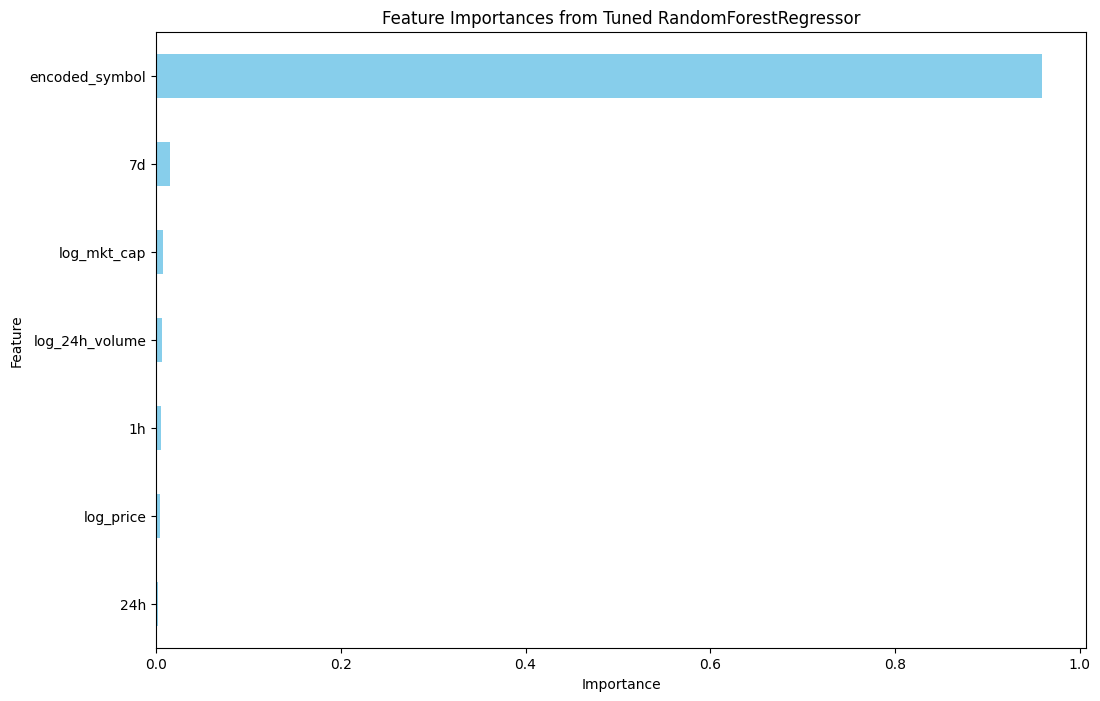

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'best_model' is your tuned RandomForestRegressor from GridSearchCV
# and 'X_train' is your training features dataframe

# Get feature importances from the best model
importances = best_model.feature_importances_

# Create a Series for easier handling
feature_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

# Create a bar plot to visualize the importances
plt.figure(figsize=(12, 8))
feature_importances.plot(kind='barh', color='skyblue')
plt.title('Feature Importances from Tuned RandomForestRegressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis() # Invert y-axis to show the most important feature at the top
plt.show()

#### Feature Importance Analysis
 

* feature importance, showing which variables had the most influence on your model's predictions. The results offer clear insights into what determines a cryptocurrency's liquidity ratio:

* Encoded Symbol (encoded_symbol): This is by far the most important feature, with an importance score close to 1. This confirms that Target Encoding was a brilliant choice. By encoding each cryptocurrency with a value based on its average liquidity, you created a highly predictive feature that captured unique information about each coin.

* Logarithmically Transformed Features: The log-transformed features (log_price, log_24h_volume, log_mkt_cap) have very low importance scores. This tells us two things:

* The model is not relying on the magnitude of these values as much as you might have thought.

* The volume_mkt_cap_ratio is already a very powerful feature, and the encoded symbol is capturing a lot of the nuance that the model needs.

* Volatility Metrics: The volatility metrics (1h, 24h, 7d) also have minimal importance. This is an interesting finding, suggesting that short-term price fluctuations don't play a major role in predicting the long-term volume_mkt_cap_ratio.

* This analysis validates your decision to create the volume_mkt_cap_ratio and your insightful choice to use Target Encoding. You have a robust and well-understood model.

In [14]:
import joblib

# The file name where you want to save the model
model_filename = 'Randomforest_Regression_model.pkl'

# Save the trained model to the file
joblib.dump(model, model_filename)

print(f"Model saved successfully as {model_filename}")

Model saved successfully as Randomforest_Regression_model.pkl


#save model labels as new feature
import os

os.makedirs('data')
df.to_csv("./data/cryptocurrency_liquidity_df.csv", index=False)